# Exploratory Data Analysis (EDA) — Overview

**Purpose:** Tell the data story with clear visuals and quick insights on the RAW dataset (no heavy preprocessing here).

## What we’ll do
1. **Load RAW data** (from `../data/raw/Waste_Management_and_Recycling_India.csv`; add `Latitude/Longitude` for plots).
2. **Quick overview**: shape, schema, missing values, descriptive stats.
3. **Distributions & leaders**  
   - Target distribution: `Recycling Rate (%)`  
   - City leaderboard (Top 10 by mean recycling %)  
   - Disposal method performance (mean recycling %)
4. **Trends & relationships**  
   - Yearly trend of recycling %  
   - Cost vs Recycling (%) scatter, colored by `Waste Type`
5. **Correlations (numeric)**: heatmap including target.
6. **Export assets (for report/dashboard)**  
   - PNG charts → `../static/`  
   - Summary CSVs → `../data/processed/eda/`

## Run order (cells)
- **Step 1**: Setup & Load (RAW)  
- **Step 2**: Overview (schema, missing, describe, categorical counts)  
- **Step 3**: Target & category visuals (hist, city/method bars)  
- **Step 4**: Trends & relationships (year line, cost scatter)  
- **Step 5**: Correlations + export PNG/CSVs

> **Artifacts saved:**  
> Charts → `../static/eda_city_top10.png`, `../static/eda_method.png`, `../static/eda_year.png`, `../static/eda_corr.png`  
> Summaries → `../data/processed/eda/` (`city_recycling_mean.csv`, `method_recycling_mean.csv`, `waste_vs_method.csv`, `year_trend.csv`)


In [17]:
# Setup
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
plt.rcParams["figure.dpi"] = 120

# Load RAW (no processed fallback)
RAW = "../data/raw/Waste_Management_and_Recycling_India.csv"
df = pd.read_csv(RAW)

# Split Lat/Long for plots if present
if "Landfill Location (Lat, Long)" in df.columns:
    latlon = df["Landfill Location (Lat, Long)"].str.split(",", n=1, expand=True)
    df["Latitude"]  = latlon[0].astype(float)
    df["Longitude"] = latlon[1].str.strip().astype(float)

print("Shape:", df.shape)
df.head(3)


Shape: (850, 15)


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year,Latitude,Longitude
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931


In [25]:
# Schema & missing
print("Shape:", df.shape)
df.info()
print("\nMissing per column:\n", df.isna().sum())

Shape: (850, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City/District                      850 non-null    object 
 1   Waste Type                         850 non-null    object 
 2   Waste Generated (Tons/Day)         850 non-null    int64  
 3   Recycling Rate (%)                 850 non-null    int64  
 4   Population Density (People/km²)    850 non-null    int64  
 5   Municipal Efficiency Score (1-10)  850 non-null    int64  
 6   Disposal Method                    850 non-null    object 
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64  
 8   Awareness Campaigns Count          850 non-null    int64  
 9   Landfill Name                      850 non-null    object 
 10  Landfill Location (Lat, Long)      850 non-null    object 
 11  Landfill Capacity (Tons)           850 no

In [24]:
# Descriptive stats
display(df.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City/District,850,34,Mumbai,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waste Type,850,5,Plastic,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waste Generated (Tons/Day),850.0,NaN,NaN,NaN,5262.249412,2786.984735,511.0,2865.75,5283.0,7757.25,9980.0
Recycling Rate (%),850.0,NaN,NaN,NaN,57.076471,16.129994,30.0,43.0,56.0,71.0,85.0
Population Density (People/km²),850.0,NaN,NaN,NaN,13489.705882,6631.081494,2335.0,7927.0,12579.5,19087.0,24032.0
Municipal Efficiency Score (1-10),850.0,NaN,NaN,NaN,7.4,1.722162,5.0,6.0,7.0,9.0,10.0
Disposal Method,850,4,Incineration,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost of Waste Management (₹/Ton),850.0,NaN,NaN,NaN,2778.458824,1276.32563,503.0,1647.5,2853.0,3855.0,4999.0
Awareness Campaigns Count,850.0,NaN,NaN,NaN,9.904706,6.070772,0.0,5.0,10.0,15.0,20.0
Landfill Name,850,34,Mumbai Landfill,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Key categoricals
for col in ["City/District","Waste Type","Disposal Method"]:
    print(f"\n{col} — unique:", df[col].nunique())
    display(df[col].value_counts().head())


City/District — unique: 34


City/District
Mumbai       25
Delhi        25
Bengaluru    25
Chennai      25
Kolkata      25
Name: count, dtype: int64


Waste Type — unique: 5


Waste Type
Plastic         170
Organic         170
E-Waste         170
Construction    170
Hazardous       170
Name: count, dtype: int64


Disposal Method — unique: 4


Disposal Method
Incineration    218
Recycling       213
Landfill        210
Composting      209
Name: count, dtype: int64

### Target & Category Insights (plots)

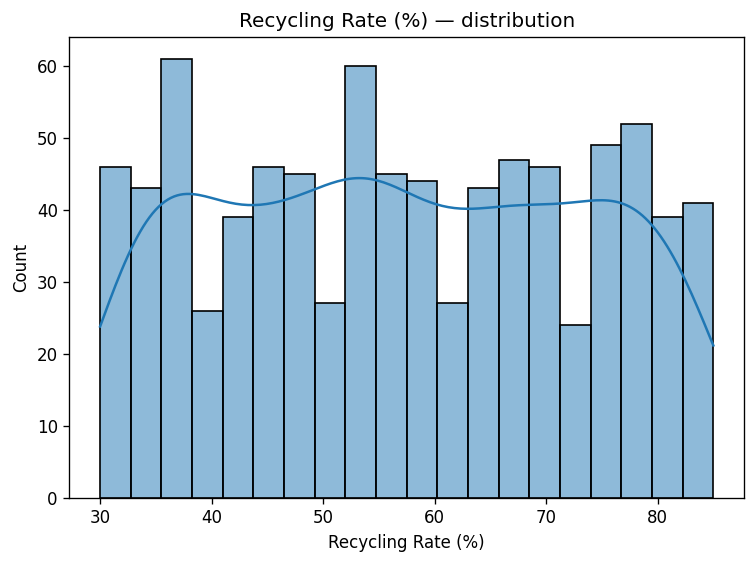

In [29]:
# Target distribution
sns.histplot(df["Recycling Rate (%)"], bins=20, kde=True)
plt.title("Recycling Rate (%) — distribution")
plt.xlabel("Recycling Rate (%)"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

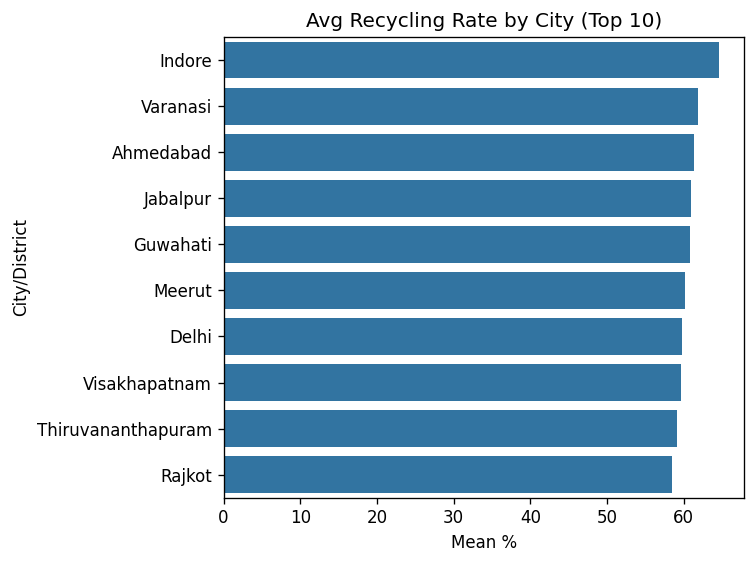

In [28]:
# City leaderboard (Top 10)
top_cities = df.groupby("City/District")["Recycling Rate (%)"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Avg Recycling Rate by City (Top 10)"); plt.xlabel("Mean %")
plt.tight_layout(); plt.show()

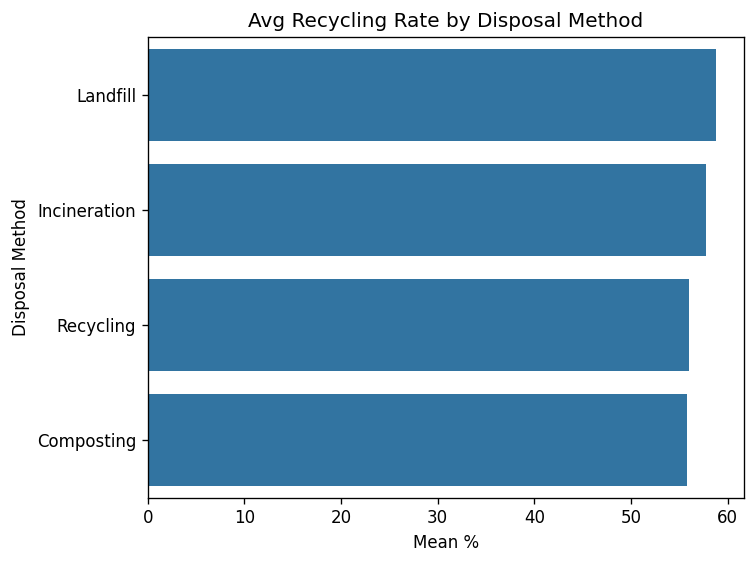

In [30]:
# Disposal method performance
meth = df.groupby("Disposal Method")["Recycling Rate (%)"].mean().sort_values(ascending=False)
sns.barplot(x=meth.values, y=meth.index)
plt.title("Avg Recycling Rate by Disposal Method"); plt.xlabel("Mean %")
plt.tight_layout(); plt.show()

### Trends & Relationships

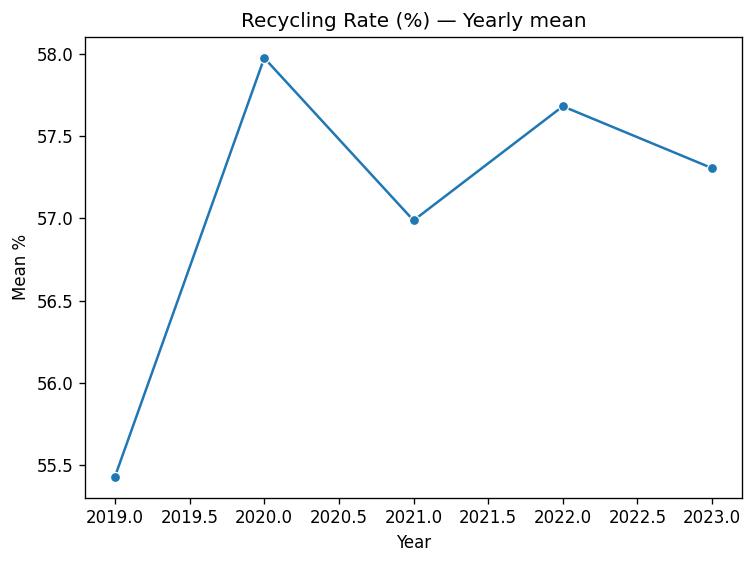

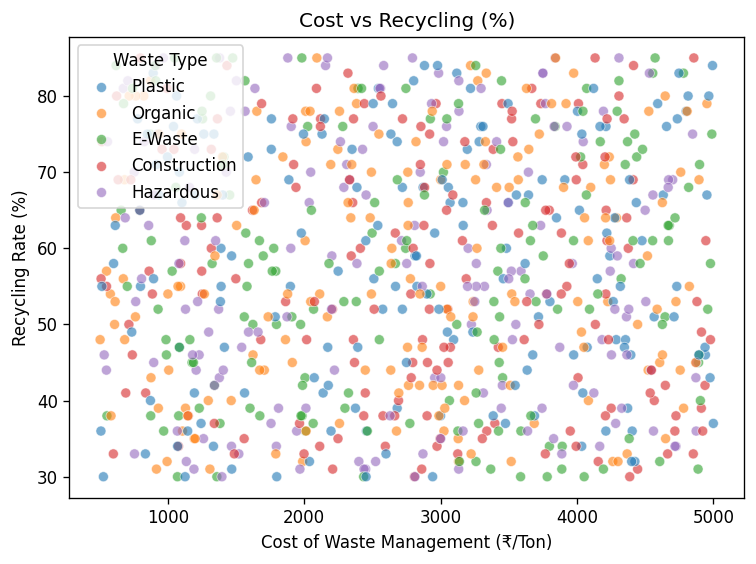

In [22]:
# Yearly trend
yr = df.groupby("Year")["Recycling Rate (%)"].mean()
sns.lineplot(x=yr.index, y=yr.values, marker="o")
plt.title("Recycling Rate (%) — Yearly mean")
plt.xlabel("Year"); plt.ylabel("Mean %")
plt.tight_layout(); plt.show()

# Cost vs Recycling (colored by Waste Type)
sns.scatterplot(data=df, x="Cost of Waste Management (₹/Ton)", y="Recycling Rate (%)",
                hue="Waste Type", alpha=0.6)
plt.title("Cost vs Recycling (%)")
plt.tight_layout(); plt.show()


### Correlations + Export assets (for report/dashboard)

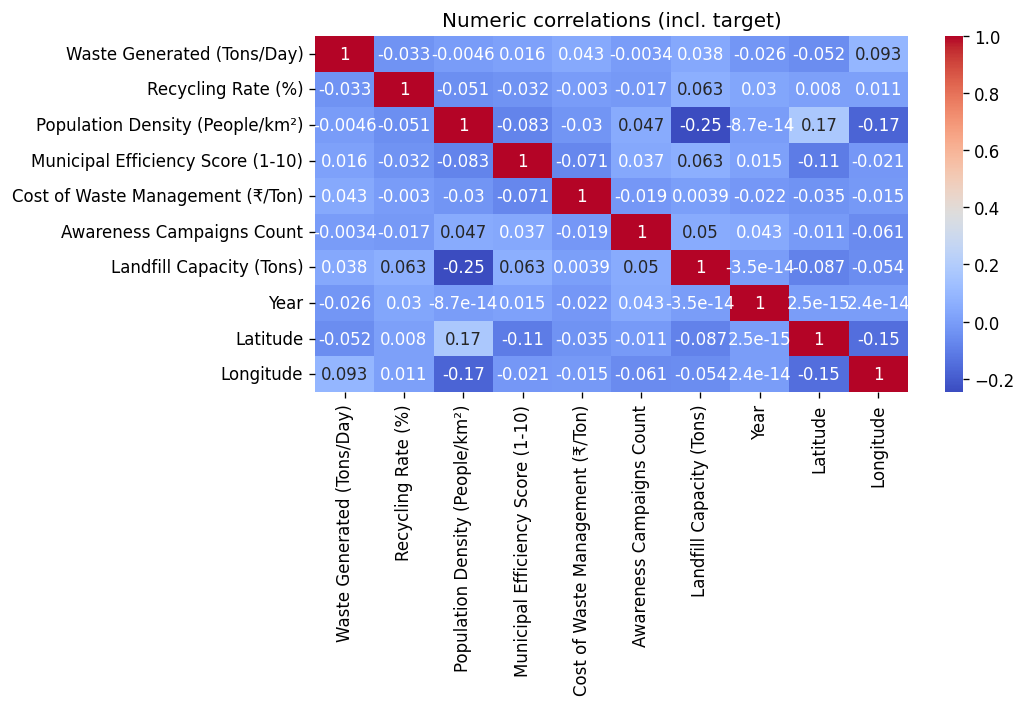

Saved PNGs -> ../static/ ; CSVs -> ../data/processed/eda/


In [23]:
# Correlation heatmap (numeric only)
num = df.select_dtypes("number").columns
plt.figure(figsize=(9,6))
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric correlations (incl. target)")
plt.tight_layout(); plt.show()

# Export figures & summary CSVs (optional but useful for Flask/report)
import os
os.makedirs("../static", exist_ok=True)
os.makedirs("../data/processed/eda", exist_ok=True)

# Recreate and save plots as PNGs
# (re-run minimal code so PNGs are saved; safe to ignore if not needed)
top_cities = df.groupby("City/District")["Recycling Rate (%)"].mean().sort_values(ascending=False).head(10)
plt.figure(); sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Avg Recycling Rate by City (Top 10)"); plt.xlabel("Mean %"); plt.tight_layout()
plt.savefig("../static/eda_city_top10.png"); plt.close()

meth = df.groupby("Disposal Method")["Recycling Rate (%)"].mean().sort_values(ascending=False)
plt.figure(); sns.barplot(x=meth.values, y=meth.index)
plt.title("Avg Recycling Rate by Disposal Method"); plt.xlabel("Mean %"); plt.tight_layout()
plt.savefig("../static/eda_method.png"); plt.close()

yr = df.groupby("Year")["Recycling Rate (%)"].mean()
plt.figure(); sns.lineplot(x=yr.index, y=yr.values, marker="o")
plt.title("Recycling Rate (%) — Yearly mean"); plt.xlabel("Year"); plt.ylabel("Mean %"); plt.tight_layout()
plt.savefig("../static/eda_year.png"); plt.close()

plt.figure(figsize=(9,6)); sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric correlations (incl. target)"); plt.tight_layout()
plt.savefig("../static/eda_corr.png"); plt.close()

# Export summary CSVs
df.groupby("City/District")["Recycling Rate (%)"].mean().sort_values(ascending=False) \
  .to_csv("../data/processed/eda/city_recycling_mean.csv")

df.groupby("Disposal Method")["Recycling Rate (%)"].mean().sort_values(ascending=False) \
  .to_csv("../data/processed/eda/method_recycling_mean.csv")

df.groupby(["Waste Type","Disposal Method"])["Recycling Rate (%)"].mean().unstack() \
  .to_csv("../data/processed/eda/waste_vs_method.csv")

df.groupby("Year")["Recycling Rate (%)"].mean() \
  .to_csv("../data/processed/eda/year_trend.csv")

print("Saved PNGs -> ../static/ ; CSVs -> ../data/processed/eda/")


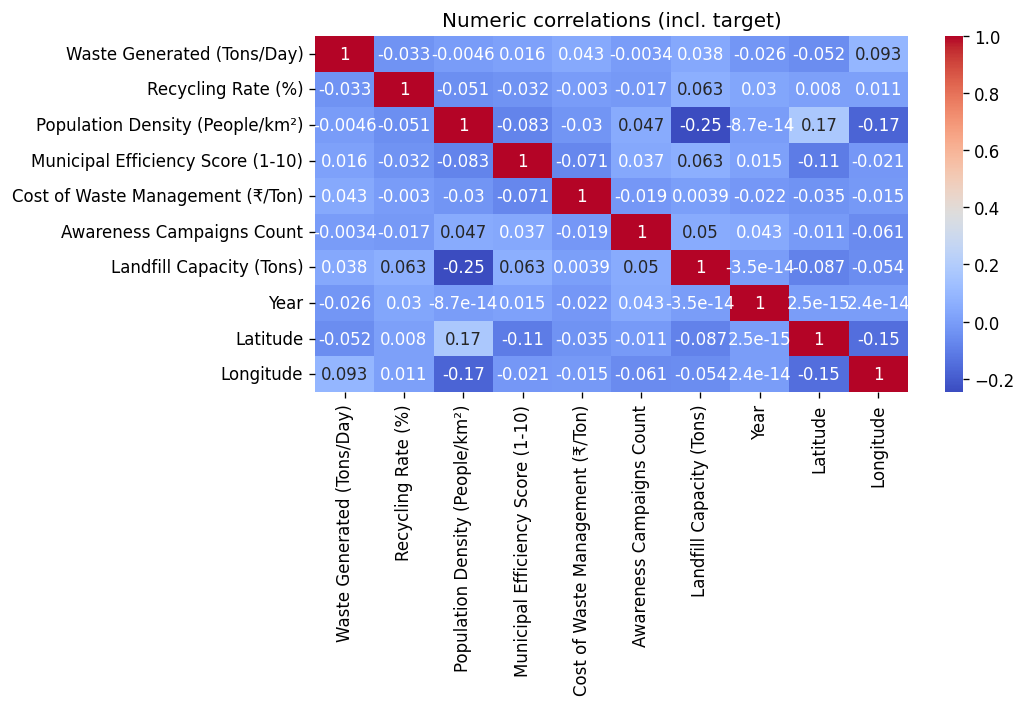

In [15]:
num = df.select_dtypes("number").columns
plt.figure(figsize=(9,6)); sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric correlations (incl. target)"); plt.tight_layout()
plt.savefig("../static/eda_corr.png"); plt.show()
